In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x=2 * np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

m=-20
b=20

learning_rate=0.01
iterations=1000

n=len(x)

def predict(x,m,b):
    return (m*x)+b

def loss_fn(x,y,m,b):
    y_lnr_reg=predict(x,m,b)
    n=len(x)
    mse=0
    for i in range(n-1):
        mse1ststep=(y_lnr_reg[i]-y[i])**2
        mse=mse+mse1ststep
    mse=mse/n
    return mse

In [2]:
a=loss_fn(x,y,m,b)
print(a)

[213.13566161]


In [3]:
def gradient_descent(x,y,m,b,learning_rate):
    y_lnr_reg=predict(x,m,b)
    m_grad_bfr_2byn=0
    b_grad_bfr_2byn=0

    for i in range(n-1):

        m_grad_adding_to_mgrad_bfr_2byn=x*(y_lnr_reg[i]-y[i])
        m_grad_bfr_2byn=m_grad_bfr_2byn+m_grad_adding_to_mgrad_bfr_2byn
        
        b_grad_adding_to_mgrad_bfr_2byn=y_lnr_reg[i]-y[i]
        b_grad_bfr_2byn=b_grad_bfr_2byn+b_grad_adding_to_mgrad_bfr_2byn

    m_grad=(2*m_grad_bfr_2byn)/n
    b_grad=(2*b_grad_bfr_2byn)/n

    return m_grad, b_grad

gradient_descent(x,y,m,b,learning_rate)

(array([[ -8.58345867],
        [-21.78783139],
        [-16.7753451 ],
        [-13.71965271],
        [ -3.57553032],
        [ -3.57497756],
        [ -1.33112118],
        [-19.85044265],
        [-13.77594976],
        [-16.22713136],
        [ -0.4717416 ],
        [-22.227742  ],
        [-19.07736086],
        [ -4.866245  ],
        [ -4.16694237],
        [ -4.20314127],
        [ -6.97241921],
        [-12.02601515],
        [ -9.89902558],
        [ -6.67419367],
        [-14.02203334],
        [ -3.19682653],
        [ -6.69517467],
        [ -8.39603445],
        [-10.45190532],
        [-17.99413488],
        [ -4.57598952],
        [-11.78487918],
        [-13.57655886],
        [ -1.06451933],
        [-13.92330452],
        [ -3.90795724],
        [ -1.49080868],
        [-21.74592089],
        [-22.12970582],
        [-18.52630701],
        [ -6.9809336 ],
        [ -2.23838385],
        [-15.68079255],
        [-10.08711897],
        [ -2.79679023],
        [-11.348

C:\Users\pubgp\AppData\Local\Temp\ipykernel_8588\3275079872.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_surface[i , j] = loss_fn(x , y , M [i , j], B[i , j ])


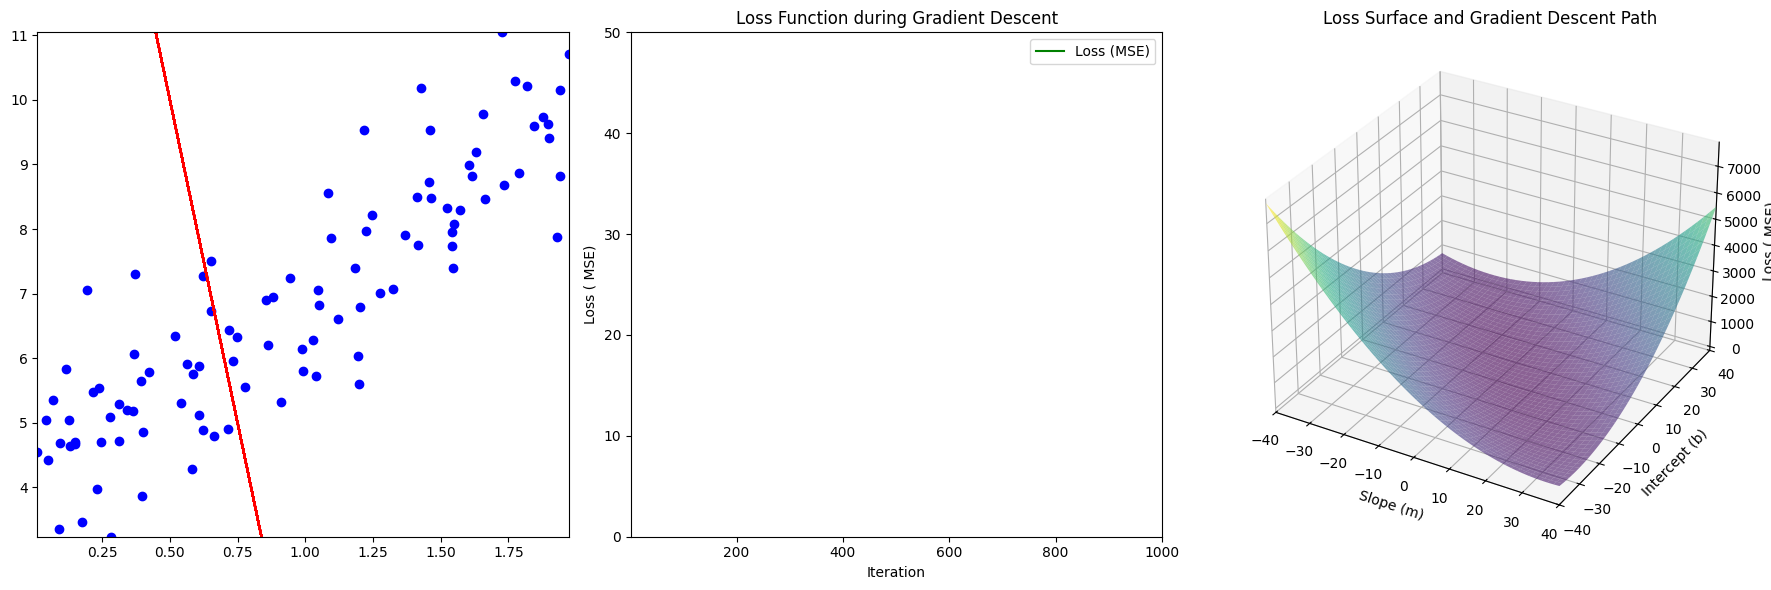

In [4]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Create grid of (m, b) values for the loss surface
m_vals = np . linspace ( -40 , 40 , 50)
b_vals = np . linspace ( -40 , 40 , 50)
M , B = np . meshgrid ( m_vals , b_vals )
loss_surface = np . zeros (M. shape )

# Compute loss surface
for i in range ( len( m_vals )):
    for j in range ( len( b_vals )):
        loss_surface[i , j] = loss_fn(x , y , M [i , j], B[i , j ])

# Set up figure with subplots
fig = plt . figure ( figsize =(18 , 6))

# Subplot 1: Data points and prediction line
ax1 = fig . add_subplot (131)
ax1 . set_xlim ( np . min (x), np .max( x ))
ax1 . set_ylim ( np . min (y), np .max( y ))
ax1 . scatter (x , y , color ='blue', label ='Data points')
line , = ax1 . plot (x , predict (x , m , b ), 'r-', label ='Prediction')

ax2 = fig . add_subplot (132)
ax2 . set_xlim (1 , iterations +1)
ax2 . set_ylim (0 , 50) # Start with an arbitrary range for loss values
loss_line , = ax2 . plot ([] , [] , 'g-', label ='Loss (MSE)')
ax2 . set_xlabel ('Iteration')
ax2 . set_ylabel ('Loss ( MSE)')
ax2 . set_title ('Loss Function during Gradient Descent')
ax2 . legend ()
# Subplot 3: 3D Loss surface plot
ax3 = fig . add_subplot (133 , projection ='3d')
ax3 . set_xlim ( -40 , 40)
ax3 . set_ylim ( -40 , 40)
ax3 . plot_surface (M , B , loss_surface , cmap ='viridis', alpha =0.6 , rstride =1 , cstride =1)
path_line , = ax3 . plot ([] , [] , [] , 'r-', marker ='o') # Path line for gradient descent
ax3 . set_xlabel ('Slope (m)')
ax3 . set_ylabel ('Intercept (b)')
ax3 . set_zlabel ('Loss ( MSE)')
ax3 . set_title ('Loss Surface and Gradient Descent Path')

def update ( frame ):
    loss_history=[]
    mb_history=[]
    global m , b
    steps_per_frame = 10 # Number of gradient descent steps per frame
    for _ in range( steps_per_frame ):
        if len ( loss_history ) >= iterations :
            break
        m , b = step_gradient (x , y , m , b , learning_rate )
        current_loss = compute_loss (x , y , m , b)
        loss_history . append ( current_loss )
        mb_history . append ((m , b ))

    # Update the line in the first subplot
    line . set_ydata ( predict (x , m , b ))

    # Update the loss function plot
    loss_line . set_data ( range (len ( loss_history )) , loss_history )
    ax2 . set_ylim (0 , max ( loss_history ) + 5)
    
    # Update the 3D loss surface plot
    m_path , b_path = zip (* mb_history )
    path_line . set_data ( m_path , b_path )
    path_line . set_3d_properties ( loss_history )
    return line , loss_line , path_line

def init ():
    loss_line.set_data ([] , [])
    path_line.set_data ([] , [])
    path_line.set_3d_properties ([])
    return line,loss_line,path_line
    # Create the animation

frames = iterations // 10
interval = 5
ani = FuncAnimation ( fig , update , frames = frames , init_func = init , interval = interval , blit = True )
plt . tight_layout ()
plt.show()

Text(0.5, 0.92, 'Loss Surface and Gradient Descent Path')